In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
rep = pd.read_csv('representatives.csv')
ad = pd.read_csv('address.csv')

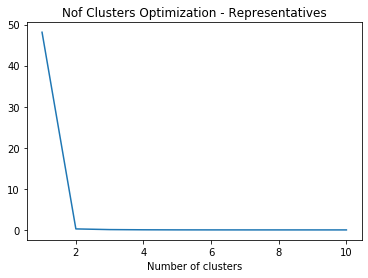

In [28]:
result = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300)
    kmeans.fit(rep.iloc[:, 1:])
    result.append(kmeans.inertia_)
    
plt.plot(range(1, 11), result)
plt.title('Nof Clusters Optimization - Representatives')
plt.xlabel('Number of clusters')
plt.show()

# Clearly we can see that the optimal nof clusters is 2 for representatives.

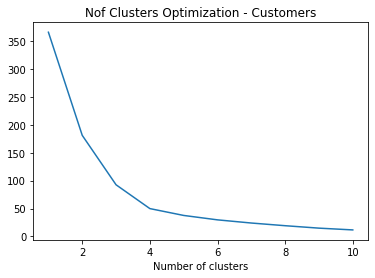

In [29]:
result = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300)
    kmeans.fit(ad.iloc[:, 1:])
    result.append(kmeans.inertia_)
    
plt.plot(range(1, 11), result)
plt.title('Nof Clusters Optimization - Customers')
plt.xlabel('Number of clusters')
plt.show()

# For the customers, we don't have a clear elbow, but one can say that 4 is a reasonable number.

In [24]:
kmeans_rep = KMeans(n_clusters=2)
kmeans_rep.fit(rep.iloc[:, 1:])
rep['cluster'] = kmeans_rep.labels_

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ad.iloc[:, 1:])
ad['cluster'] = kmeans.labels_

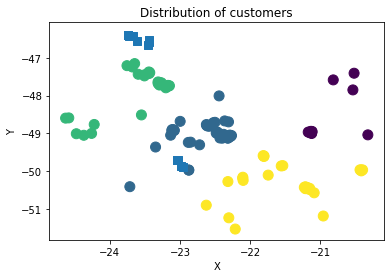

In [26]:
plt.scatter(ad.iloc[:,1], ad.iloc[:,2], s = 100, c = ad.cluster)
plt.scatter(rep.y, rep.x, marker='s', s = 50)
plt.title('Distribution of customers')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

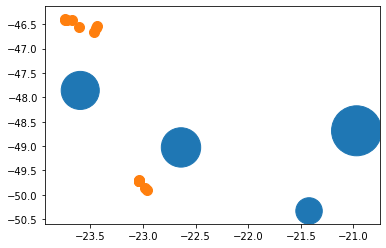

In [27]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = ad.cluster.value_counts()*50)
plt.scatter(rep.y, rep.x, s= 100)

In [14]:
ad.cluster.value_counts()

1    50
2    31
3    29
0    14
Name: cluster, dtype: int64